# House Price Prediction - Advanced regression Assignment

The solution is divided into the following sections:

1.Data understanding and exploration                                                                                             
2.Data cleaning                                                                                                                
3.Data preparation                                                                                                           
4.Model building and evaluation
5.Observation and inference

1. Data Understanding and Exploration                                                                                          
Let's import all the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [2]:
# importing all the required libraries
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
house = pd.read_csv("train.csv", encoding = 'utf-8')


In [5]:
#let's check the head of the dataframe
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
#Lets Check the dimensions
house.shape

(1460, 81)

In [8]:
# let's see column details
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are multiple column with null values

In [10]:
#let's see numerical description of data set
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [11]:
#Let's check the duplicates
sum(house.duplicated(subset = 'Id')) == 0

True

In [12]:
# since,there are multiple columns with high nulls, lets group them together
house.columns[house.isnull().any()] 

null = house.isnull().sum()/len(house)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

The nulls in the columns may affect the price the house since there will be absence of facililties as provided in th data dictionary

In [13]:
# Let's represent the categorical variable with none
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    house[i].fillna("none", inplace=True)

In [16]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be represented with similar 'Neighborhood' values

house['LotFrontage'] = house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["Electrical"].dropna(inplace=True)

### lets perform EDA

All numeric (float and int) variables in the dataset

In [20]:
data_numeric = house.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [21]:
#As ID column is not required let's drop the ID column
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Let's plot target variable 'sale Price' vs a few select columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

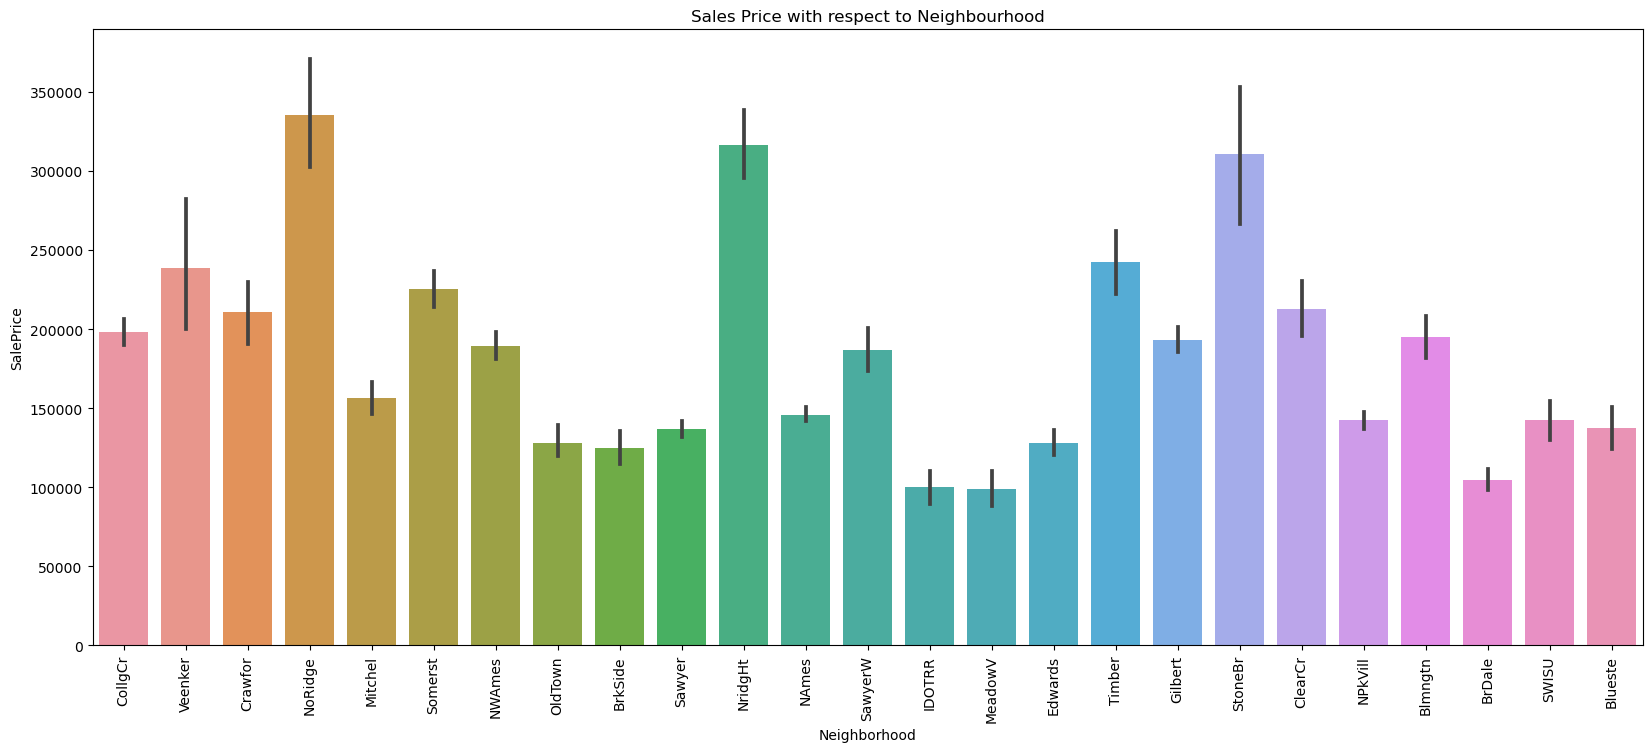

In [22]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= house)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

We can clearly see the the house praise are varying with different nieghbours

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

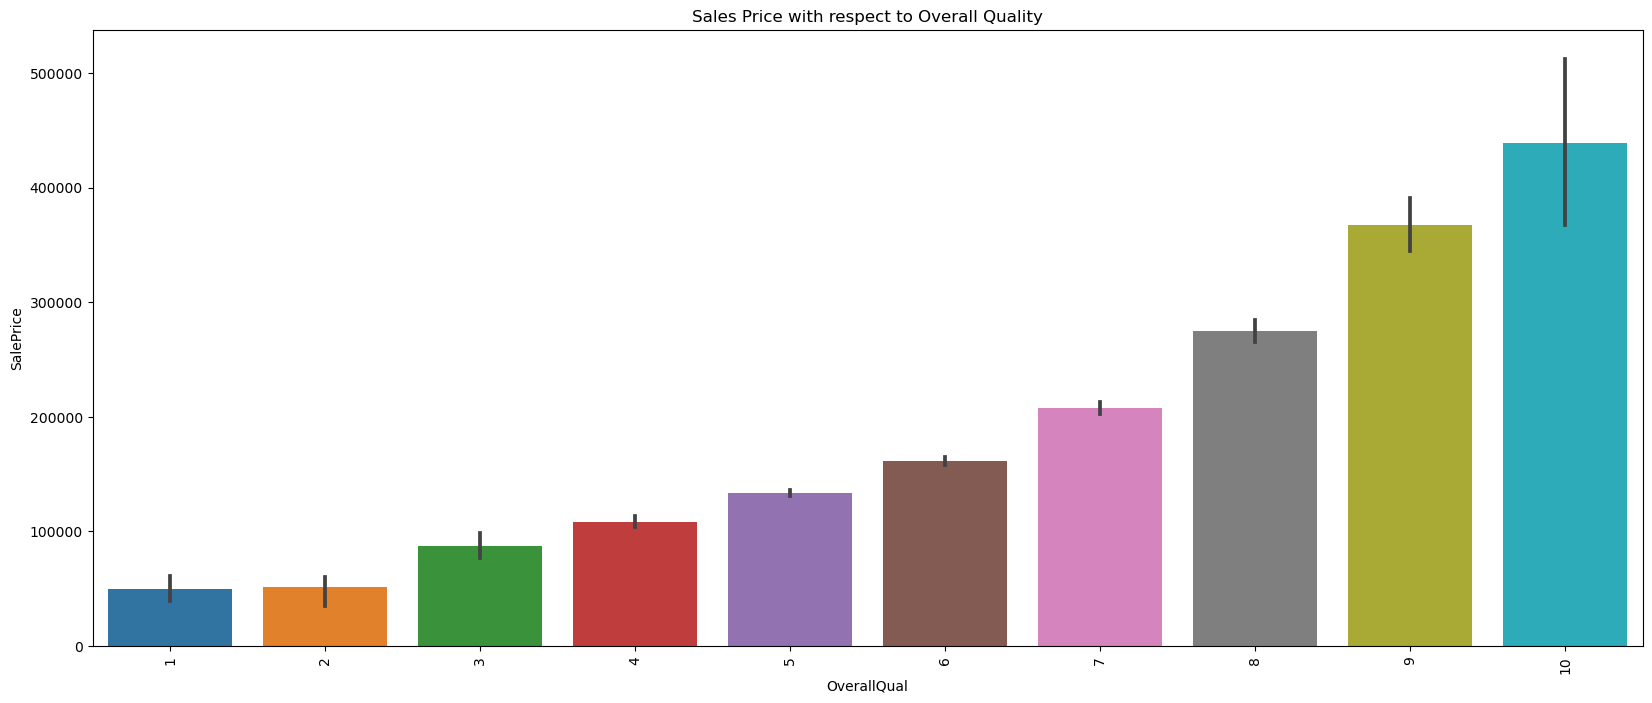

In [23]:
#Let's plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

Here we can clearly see as the overall quality increases the house priceses will increase

<Axes: xlabel='SalePrice', ylabel='Density'>

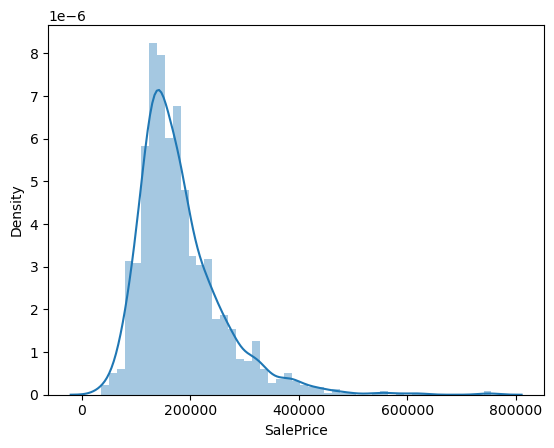

In [26]:
#Let's plot distribution plot
sns.distplot(house['SalePrice'])

Since distribution plot skewed towards left we will apply log transformation

<Axes: xlabel='SalePrice', ylabel='Density'>

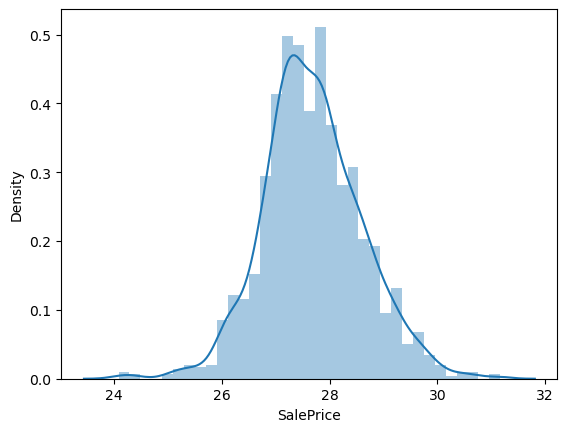

In [36]:
#Log Transformation
house['SalePrice']=np.log1p(house['SalePrice'])
sns.distplot(house['SalePrice'])


In [38]:
# correlation matrix
cor = data_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.349876  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

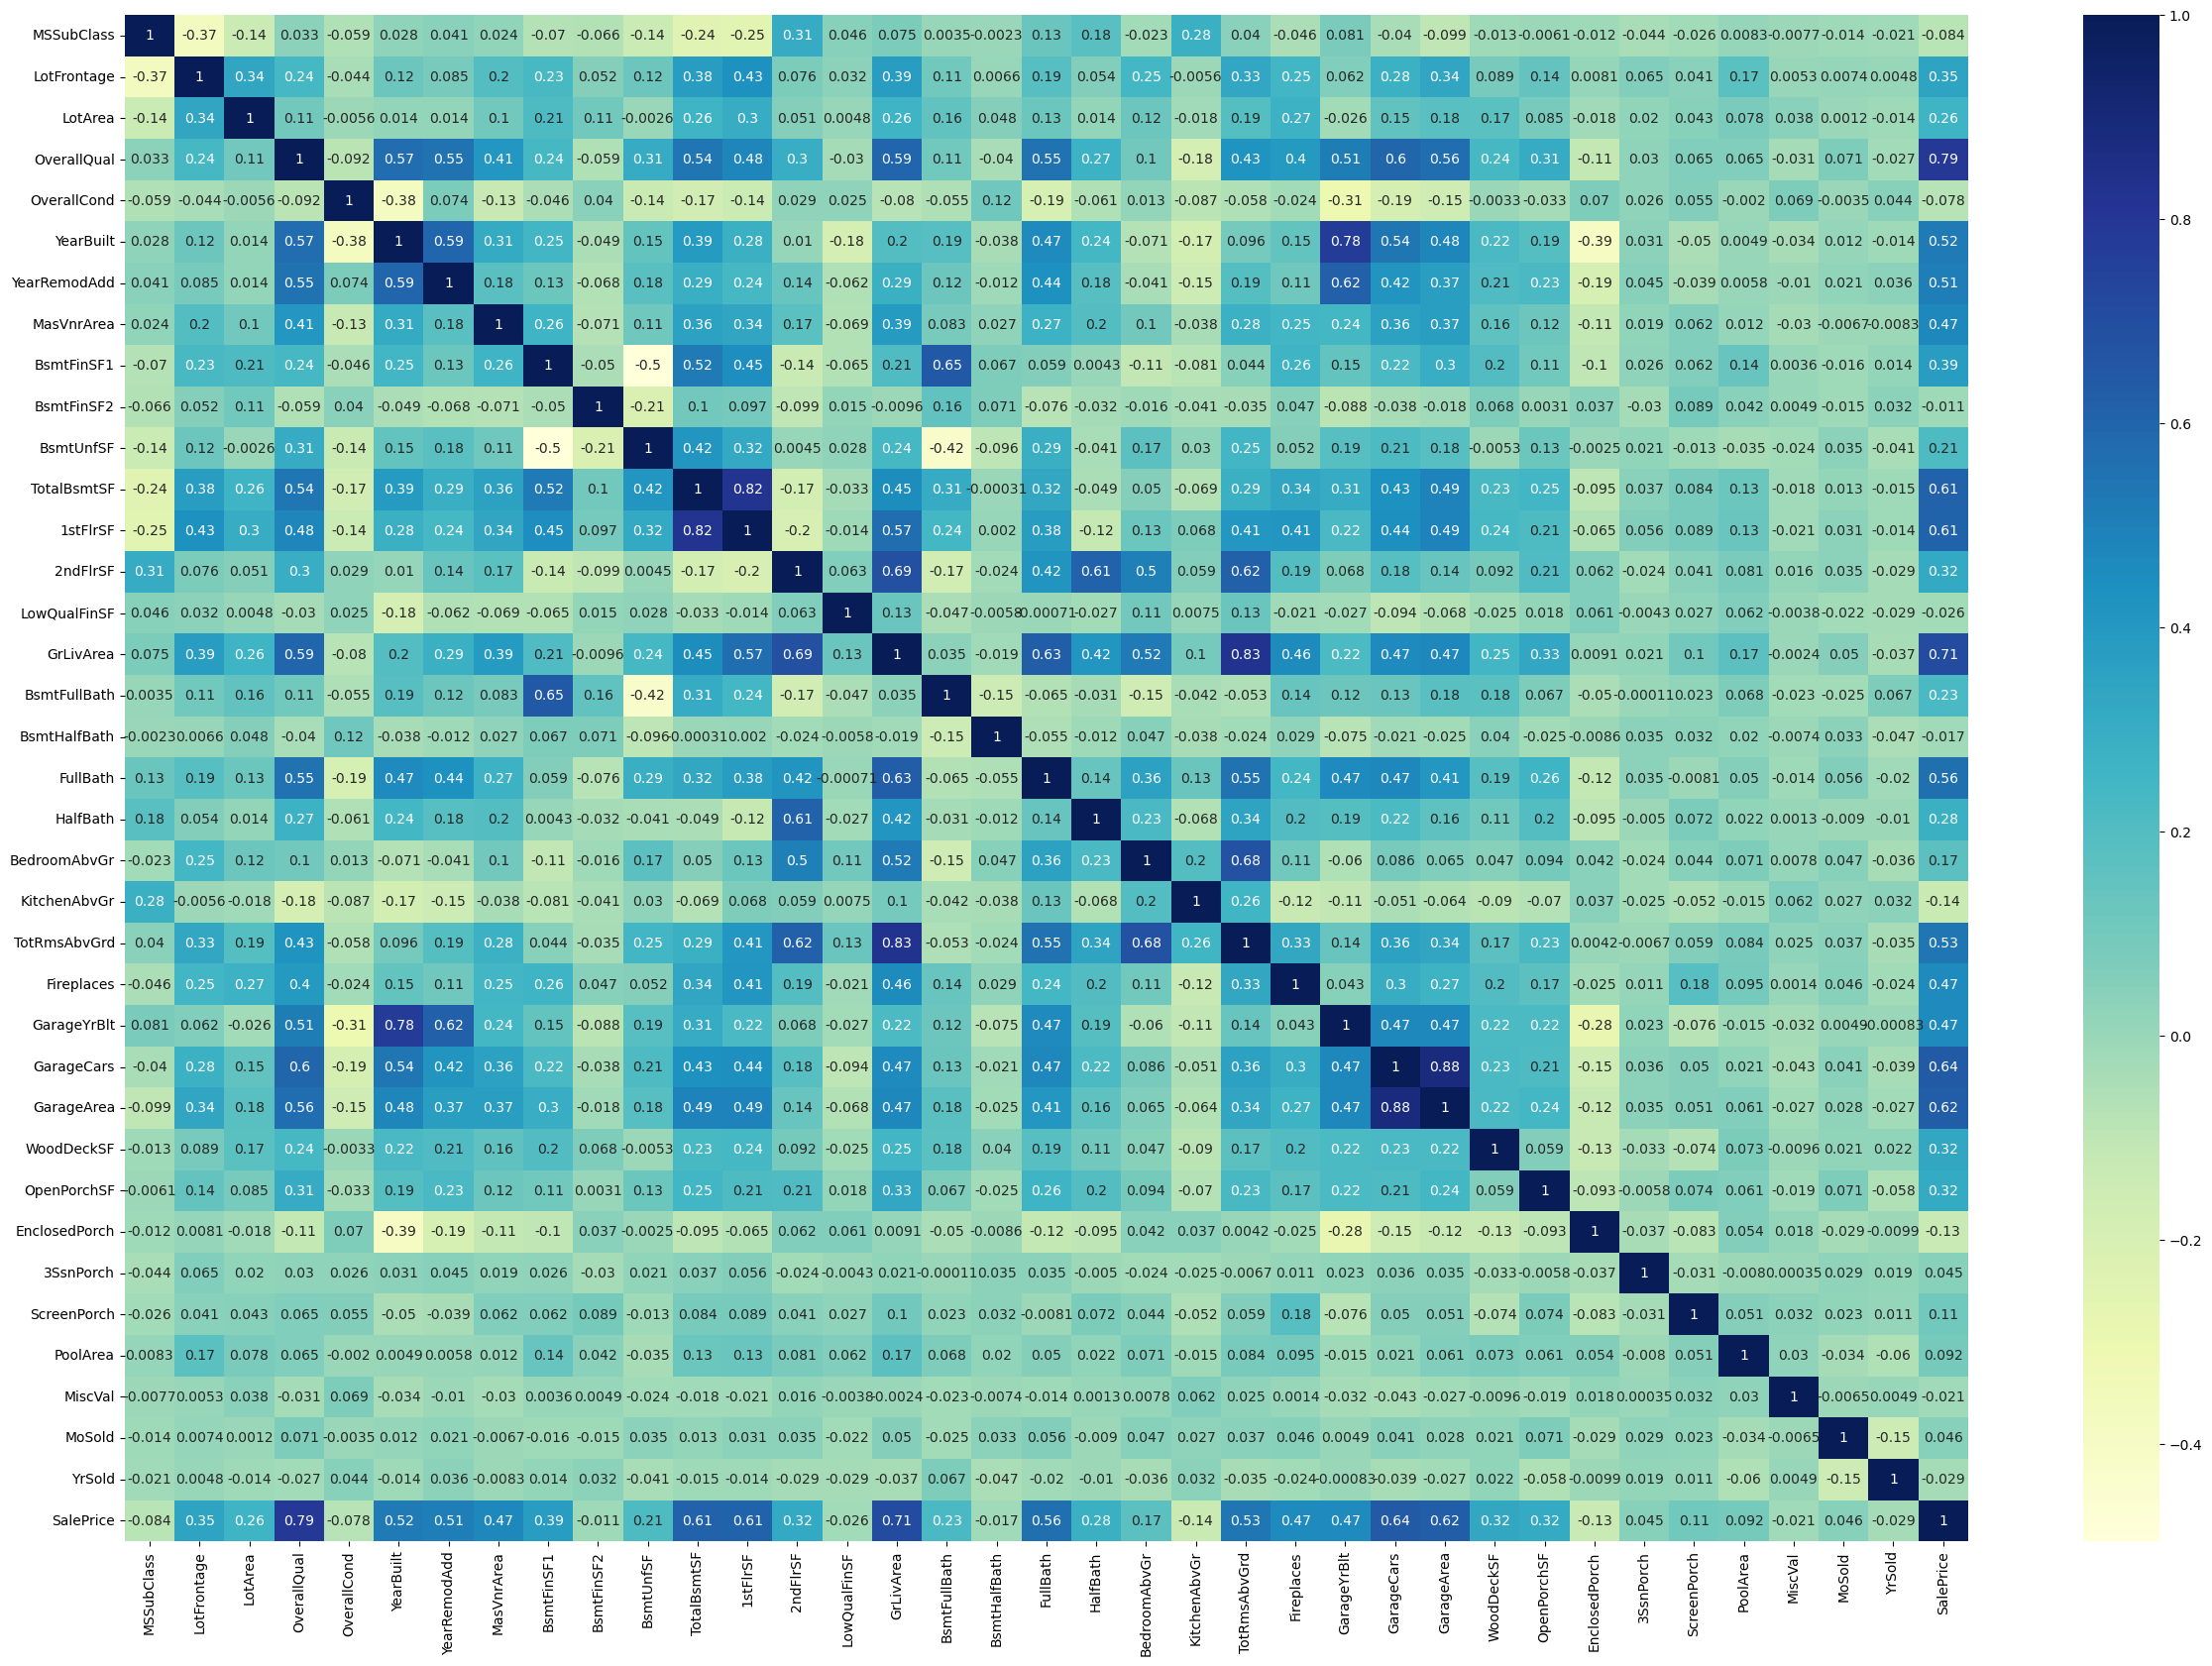

In [39]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Many of the variables are high;y corelated whereas some of them are not

## Let's check the predictive power

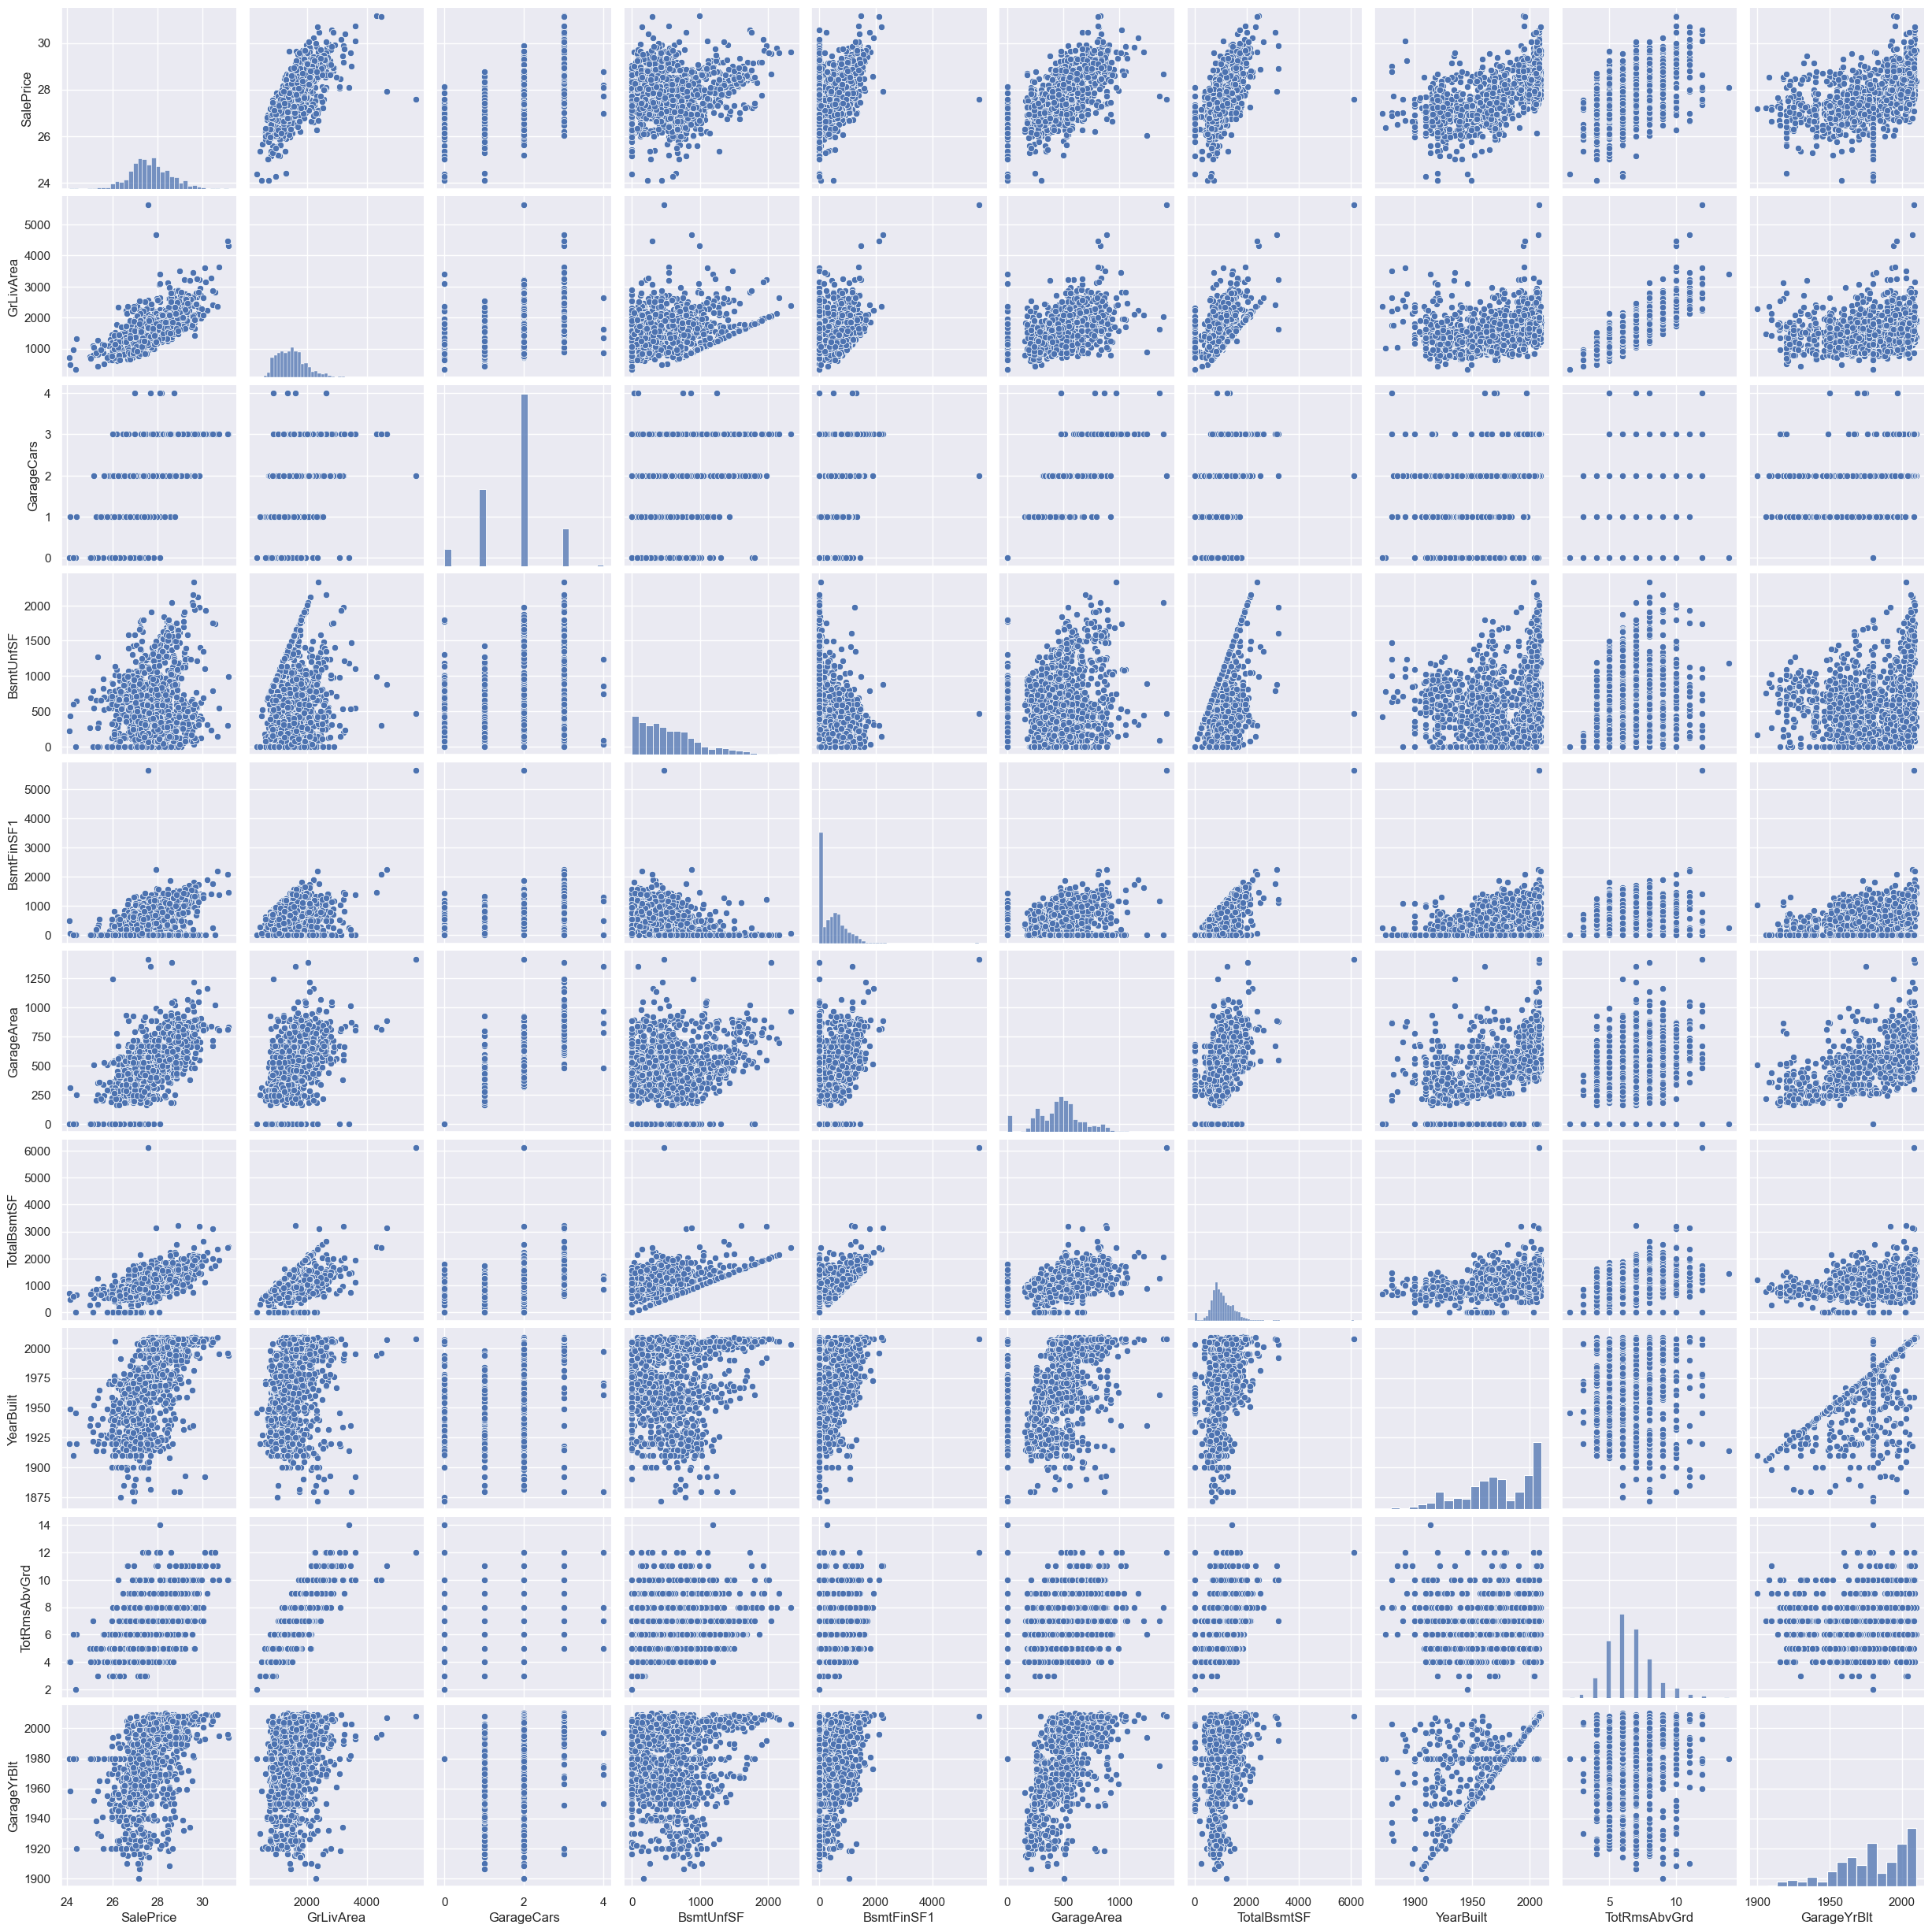

In [41]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house[cols], size = 2.5)
plt.show()

In [42]:
#Let's drop the columns which are highly correlated and which does not contribute to th sales price of the house 
house = house.drop(['GarageCars'], axis = 1)
house = house.drop(['BsmtUnfSF'], axis = 1)
house = house.drop(['TotRmsAbvGrd'], axis = 1)
house = house.drop(['GarageYrBlt'], axis = 1) 

In [44]:
#Let's see the head
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

In [45]:
house.shape


(1460, 77)

There are 4 Highly co-related columns we have dropped

In [46]:
#Let's check numeric columns
house.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0          2003          2003       196.0         706           0   
1          1976          1976         0.0         978           0   
2          2001          2002       162.0         486           0   
3          1915          1970         0.0         216           0   
4          2000          2000       350.0         655           0   
...         ...           ...         ...         ...         ...   
1455       1999          2000         0.0           0           0   
1456       1978          1988       119.0         790         163   
1457       1941          2006         0.0         275           0   
1458       1950          1996         0.0          49        1029   
1459       1965          1965         0.0         830         290   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              0         548           0           61              0   
1              1         460         298            0              0   
2              1         608           0           42              0   
3              1         642           0           35            272   
4              1         836         192           84              0   
...          ...         ...         ...          ...   

In [47]:
#Let's analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=house)
plt.show()

In [49]:
 def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [50]:
 # Removing some outliers on lower right side of 'GrLivArea'
house = remove_outliers(house,'GrLivArea')

In [52]:
#now let's check the shape
house.shape

(1429, 77)

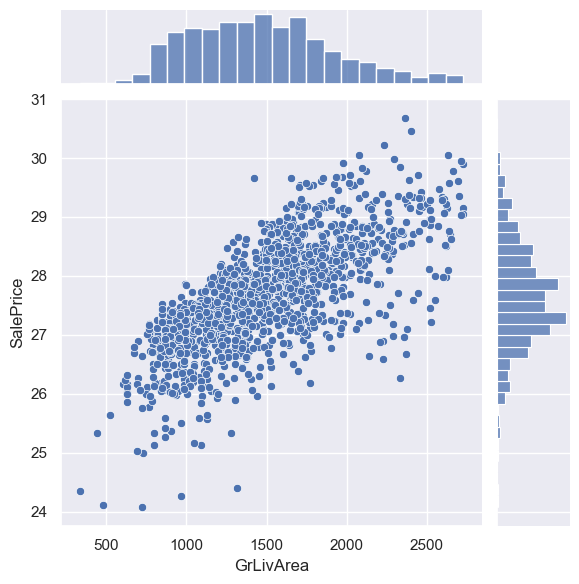

In [54]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = house['GrLivArea'], y = house['SalePrice'])
plt.show()

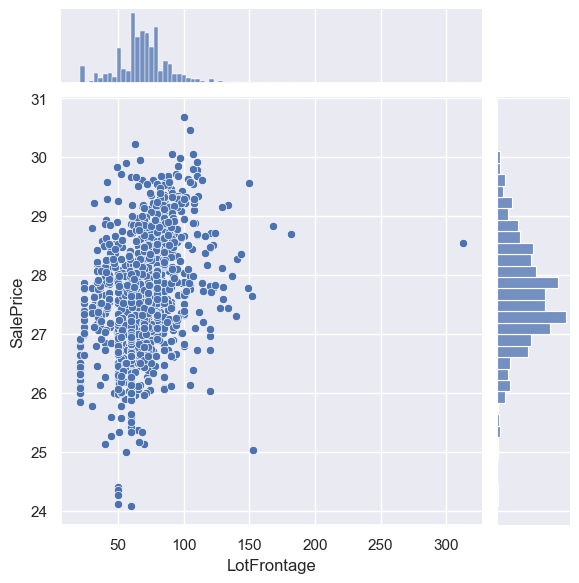

In [55]:
# Lot frontage vs SalePrice 
sns.jointplot(x = house['LotFrontage'], y = house['SalePrice'])
plt.show()

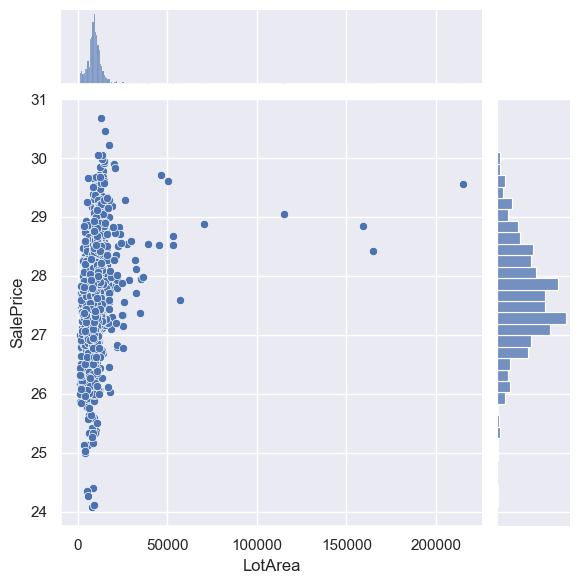

In [56]:
# LotArea vs SalePrice
sns.jointplot(x = house['LotArea'], y = house['SalePrice'])
plt.show()

In [58]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = house['1stFlrSF'], y = house['SalePrice'])
plt.show()

In [59]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = house['2ndFlrSF'], y = house['SalePrice'])
plt.show()

In [60]:
# OverallQual vs SalePrice
sns.jointplot(x = house['OverallQual'], y = house['SalePrice'])
plt.show()

In [61]:
# OverallCond vs SalePrice
sns.jointplot(x=house['OverallCond'], y = house['SalePrice'])
plt.show()

Add observation


In [62]:
#Let's derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [64]:
# PropAge -  Property Age from yearsold - yearbuilt
house['PropAge'] = (house['YrSold'] - house['YearBuilt'])
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

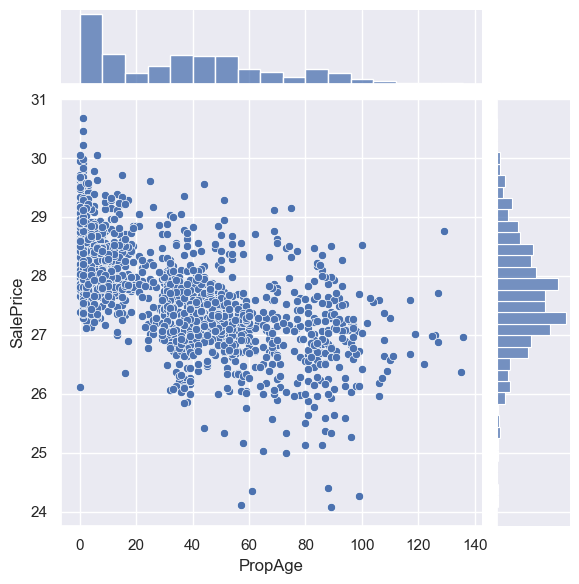

In [65]:
# PropAge vs SalePrice
sns.jointplot(x = house['PropAge'], y = house['SalePrice'])
plt.show()

Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further

In [66]:
house = house.drop(['MoSold'], axis = 1)
house = house.drop(['YrSold'], axis = 1)
house = house.drop(['YearBuilt'], axis = 1)
house = house.drop(['YearRemodAdd'], axis = 1)
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf           0          856    GasA        Ex          Y   
1          Unf           0         1262    GasA        Ex          Y   
2          Unf           0          920    GasA        Ex          Y   
3          Unf           0          756    GasA        Gd          Y   
4          Unf           0         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0        Typ           0        none     Attchd          RFn         548   
1        Typ           1          TA     Attchd          RFn         460   
2        Typ           1          TA     Attchd          RFn         608   
3        Typ           1          Gd     Detchd          Unf         642   
4        Typ           1          TA   

In [68]:
house.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [69]:
house.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [70]:
# Let's also drop columns that show very low variance and thus not required for predictions
house = house.drop(['Street'], axis = 1)
house = house.drop(['Utilities'], axis = 1)

Just to check the variance of these columns

In [72]:
 
l2= house.select_dtypes(include=['float64', 'int64'])
l2

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0          196.0         706           0          856       856       854   
1            0.0         978           0         1262      1262         0   
2          162.0         486           0          920       920       866   
3            0.0         216           0          756       961       756   
4          350.0         655           0         1145      1145      1053   
...          ...         ...         ...          ...       ...       ...   
1455         0.0           0           0          953       953       694   
1456       119.0         790         163         1542      2073         0   
1457         0.0         275           0         1152      1188      1152   
1458         0.0          49        1029         1078      1078         0   
1459         0.0         830         290         1256      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0   
4                0       2198             1             0         2         1   
...            ...        ...           ...           ...       ...       ...   
1455             0       1647             0             0         2         1   
1456             0       2073             1             0         2         0   
1457             0       2340             0             0         2         0   
1458             0       1078             1             0         1         0   
1459             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0                3             1           0         548           0   
1                3             1           1         460         298   
2                3             1           1         608           0   
3                3             1           1         642           0   
4                4             1           1         836         192   
...            ...           ...         ...         ...         ...   
1455             3             1           1         460           0   
1456             3             1           2         500         349   
1457             4             1           2         252           0   
1458             2             1           0         240         366   
1459             3             1           0         276         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272        

In [73]:
for i in l2:
    print(house[i].value_counts())

1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: Id, Length: 1429, dtype: int64
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
72.0       8
108.0      8
180.0      

In [74]:
 house = house.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)


These Columns were having high null values, some of which were imputed. After imputing, it was found that there was very little variance in the data. So we have decided to drop these columns.

In [76]:
house.shape

(1429, 63)

# Data Preparation

Now Let's prepare the data and build model

In [79]:
 #type of each feature in data: int, float, object
types = house.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [80]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [81]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [82]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


### Create Dummy columns

In [84]:
house = pd.get_dummies(house, drop_first=True )
house.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  PropAge  \
0              0          0            0         0  28.201369        5   
1              0          0            0         0  27.882041       31   
2              0          0            0         0  28.361335        7   
3            272          0            0         0  27.284263       91   
4              0          0            0         0  28.619337        8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighb

In [85]:
X = house.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PropAge  MSZoning_FV  \
0              0          0            0         0        5            0   
1              0          0            0         0       31            0   
2              0          0            0         0        7            0   
3            272          0            0         0       91            0   
4              0          0            0         0        8            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                  

In [86]:
# Putting response variable to y
y = house['SalePrice']

y.head()

0    28.201369
1    27.882041
2    28.361335
3    27.284263
4    28.619337
Name: SalePrice, dtype: float64

In [87]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])


In [90]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.746261  0.154684     2.241710    -0.513939    1.145212   
1070   -0.869945     0.130905 -0.020017    -0.764271    -0.513939    0.152993   
513    -0.869945     0.083570 -0.115156    -0.012775    -0.513939   -0.564274   
467     0.324542     0.462250 -0.086269    -0.764271     1.258264    0.774624   
993     0.085645    -0.058435 -0.148775    -0.012775    -0.513939   -0.564274   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
11      1.323938   -0.300737     0.345478  0.113320  1.995226     -0.111211   
1070    0.360916   -0.300737     0.030191 -0.267693 -0.769750     -0.111211   
513    -0.223442   -0.300737     0.119563 -0.176705 -0.769750     -0.111211   
467    -0.106571   -0.300737    -0.764234 -0.722635  1.060654     -0.111211   
993    -1.008820   -0.300737    -0.709617 -1.115022  1.046127     -0.111211   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
11     1.923409      1.131973     -0.250936  2.754667 -0.727119      1.478865   
1070  -0.932170      1.131973     -0.250936 -0.990631 -0.727119      0.212713   
513   -0.860557     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
467    0.401627     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
993    0.079368     -0.816345     -0.250936  0.882018  1.275964      0.212713   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
11       -0.222797    2.231812    1.267298    0.485675    -0.351334   
1070     -0.222797   -0.918240   -0.857140   -0.758474    -0.368801   
513      -0.222797   -0.918240    0.077613    0.257158    -0.718144   
467      -0.222797    2.231812   -0.734395    0.663411    -0.718144   
993      -0.222797   -0.918240    0.455291   -0.758474    -0.106794   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PropAge  MSZoning_FV  \
11        -0.378185  -0.115383    -0.268919 -0.054574 -1.209026            0   
1070      -0.378185  -0.115383     3.351363 -0.054574  0.445587            0   
513        2.265177  -0.115383    -0.268919 -0.054574 -0.447904            0   
467       -0.378185  -0.115383    -0.268919 -0.054574  0.908879            0   
993       -0.378185  -0.115383    -0.268919 -0.054574 -1.209026            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
11              0            1            0             0             0   
1070            0            1            0             0             0   
513             0            1            0             0             0   
467             0            1            0             0             0   
993             0            1            0             0             0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
11               0                0                0                1   
1070             1                0                0                1   
513              1                0                0                0   
467              1                0                0                1   
993              1                0                0                1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
11                    0              0              0                 1   
1070                  0              0              0                 1   
513                   0              0              0                 0   
467                   0              0              0                 1   
993                   0              0              0                 1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
11                0              0                     0                    0   
1070              0              0                     0                    0   
513               0              0                     0         

In [91]:
X_test.head()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
461     0.282163    -0.495702  -0.339155     0.620334     3.325664   
335     3.002345     0.729276  17.009026    -0.825989     0.435637   
200    -0.851246     0.484280  -0.190859    -1.549150    -0.527705   
214     0.055482    -0.005711   0.068493    -0.102827     1.398980   
1003    0.735527     0.484280   0.134598    -0.825989     0.435637   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
461    -0.606456   -0.211663    0.997135    -1.205047 -1.556925  0.506037   
335    -0.606456    1.881258    0.620602     1.075768  1.258064 -0.435654   
200    -0.606456   -1.026482   -0.257974     0.157612 -0.084718 -0.835813   
214     0.272709   -0.146477   -0.257974    -0.891708 -1.249541  0.848688   
1003    0.335917   -1.026482   -0.257974     1.515413  1.422541 -0.835813   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
461       -0.09698  -0.813247      1.073876     -0.215271 -1.099305 -0.803081   
335       -0.09698   0.616745      2.969732     -0.215271  0.802316 -0.803081   
200       -0.09698  -0.843999     -0.821980     -0.215271  0.802316 -0.803081   
214       -0.09698  -0.248718     -0.821980     -0.215271 -1.099305  1.176929   
1003      -0.09698   0.383905     -0.821980     -0.215271  0.802316 -0.803081   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
461       0.172438     -0.185172   -0.988037    0.530538    1.165362   
335       0.172438     -0.185172    2.151725    0.299231    4.227488   
200      -1.081391     -0.185172   -0.988037   -0.138775    0.248203   
214       0.172438     -0.185172   -0.988037   -0.832694   -0.728127   
1003      1.426267      4.779760   -0.988037    0.294310   -0.728127   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PropAge  \
461     -0.747921      -0.328244  -0.127886     -0.27671       0.0  1.326790   
335     -0.747921      -0.328244  -0.127886     -0.27671       0.0  0.303675   
200      0.135073      -0.328244  -0.127886     -0.27671       0.0 -0.924063   
214     -0.251236      -0.328244  -0.127886     -0.27671       0.0 -0.037363   
1003    -0.747921      -0.328244  -0.127886     -0.27671       0.0 -0.105571   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
461             0            0            1            0             0   
335             0            0            1            0             0   
200             0            0            0            1             0   
214             0            0            1            0             0   
1003            0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
461              0             1                0                0   
335              0             0                1                0   
200              0             1                0                0   
214              0             0                0                0   
1003             0             0                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
461                 1                  0              0              0   
335                 0                  0              0              0   
200                 1                  0              0              0   
214                 1                  0              1              0   
1003                1                  0              0              0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
461                  1              0              0                     0   
335                  0              0              1                     0   
200                  0              0              0                     0   
214                  0              0              0                     0   
1003                

In [100]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.103808      0.041295         0.010044        0.004156      0.0001   
1       0.056242      0.005411         0.006583        0.002143       0.001   
2       0.016275      0.002993         0.007165        0.002796        0.01   
3       0.017211      0.005451         0.006394        0.002574        0.05   
4       0.017361      0.002880         0.008634        0.002164         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.214971          -0.182113          -0.207196   
1   {'alpha': 0.001}          -0.191654          -0.185815          -0.197552   
2    {'alpha': 0.01}          -0.195522          -0.208947          -0.217324   
3    {'alpha': 0.05}          -0.238627          -0.224062          -0.245621   
4     {'alpha': 0.1}          -0.286596          -0.255947          -0.295799   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.204094          -0.181029        -0.197881        0.013784   
1          -0.188940          -0.179071        -0.188607        0.006134   
2          -0.204268          -0.194829        -0.204178        0.008460   
3          -0.221260          -0.216013        -0.229117        0.011152   
4          -0.253179          -0.250555        -0.268415        0.018905   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.149052           -0.155105   
1                1           -0.162975           -0.167083   
2                3           -0.196462           -0.194576   
3                4           -0.226240           -0.222276   
4                5           -0.266592           -0.263870   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.148197           -0.150489           -0.153465   
1           -0.159976           -0.166235           -0.166216   
2           -0.191742           -0.193741           -0.197007   
3           -0.221949           -0.224255           -0.224591   
4           -0.261862           -0.265978           -0.265374   

   mean_train_score  std_train_score  
0         -0.151262         0.002627  
1         -0.164497         0.002662  
2         -0.194706         0.001903  
3         -0.223862         0.001582  
4         -0.264735         0.001697

In [102]:
 # plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

 From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.

In [103]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-1.73490772e-02,  3.09618460e-02,  4.43304028e-02,  2.33836643e-01,
        1.30966858e-01,  0.00000000e+00,  8.68407694e-02,  5.69644602e-03,
        8.89125883e-02,  4.11957065e-03,  0.00000000e+00, -3.69871284e-03,
        2.90126948e-01,  2.71170828e-02, -0.00000000e+00,  3.79955949e-03,
        7.87322274e-03, -4.47583563e-03, -2.29418705e-02,  4.45967821e-02,
        8.11497247e-02,  2.55125625e-02,  0.00000000e+00,  1.28034395e-03,
        6.86891693e-03,  2.34229861e-02,  7.91256014e-03, -2.07314818e-01,
        0.00000000e+00,  0.00000000e+00,  6.10502015e-02, -9.31070004e-03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.97326715e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero


In [104]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 27.549),
 ('MSSubClass', -0.017),
 ('LotFrontage', 0.031),
 ('LotArea', 0.044),
 ('OverallQual', 0.234),
 ('OverallCond', 0.131),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.087),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', 0.089),
 ('1stFlrSF', 0.004),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.004),
 ('GrLivArea', 0.29),
 ('BsmtFullBath', 0.027),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.004),
 ('HalfBath', 0.008),
 ('BedroomAbvGr', -0.004),
 ('KitchenAbvGr', -0.023),
 ('Fireplaces', 0.045),
 ('GarageArea', 0.081),
 ('WoodDeckSF', 0.026),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.001),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.023),
 ('PoolArea', 0.008),
 ('PropAge', -0.207),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.061),
 ('MSZoning_RM', -0.009),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),


In [105]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8984451455989075
0.8972800204371189


In [106]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.27908951517196373


### The R2 values for Train and Test matches well, indicating an optimum model

In [107]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [108]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  27.549
1   MSSubClass  -0.017
2  LotFrontage   0.031
3      LotArea   0.044
4  OverallQual   0.234

In [109]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0          constant  27.549
13        GrLivArea   0.290
4       OverallQual   0.234
5       OverallCond   0.131
9       TotalBsmtSF   0.089
..              ...     ...
1        MSSubClass  -0.017
19     KitchenAbvGr  -0.023
173  KitchenQual_TA  -0.034
165    HeatingQC_TA  -0.035
28          PropAge  -0.207

[211 rows x 2 columns]

In [110]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0                 constant  27.549
13               GrLivArea   0.290
4              OverallQual   0.234
5              OverallCond   0.131
9              TotalBsmtSF   0.089
7               BsmtFinSF1   0.087
21              GarageArea   0.081
31             MSZoning_RL   0.061
134       Foundation_PConc   0.058
20              Fireplaces   0.045
3                  LotArea   0.044
175         FireplaceQu_Gd   0.033
2              LotFrontage   0.031
50    Neighborhood_Crawfor   0.030
70         Condition1_Norm   0.028
14            BsmtFullBath   0.027
22              WoodDeckSF   0.026
210  SaleCondition_Partial   0.025
26             ScreenPorch   0.023
27                PoolArea   0.008
17                HalfBath   0.008
25               3SsnPorch   0.007
8               BsmtFinSF2   0.006
10                1stFlrSF   0.004
16                FullBath   0.004
24           EnclosedPorch   0.001
12            LowQualFinSF  -0.004
18            BedroomAbvGr  -0.004
32             MSZoning_RM  -0.009
1               MSSubClass  -0.017
19            KitchenAbvGr  -0.023
173         KitchenQual_TA  -0.034
165           HeatingQC_TA  -0.035
28                 PropAge  -0.207

In [112]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'MSZoning_RL', 'Foundation_PConc', 'Fireplaces', 'LotArea', 'FireplaceQu_Gd', 'LotFrontage', 'Neighborhood_Crawfor', 'Condition1_Norm', 'BsmtFullBath', 'WoodDeckSF', 'SaleCondition_Partial', 'ScreenPorch', 'PoolArea', 'HalfBath', '3SsnPorch', 'BsmtFinSF2', '1stFlrSF', 'FullBath', 'EnclosedPorch', 'LowQualFinSF', 'BedroomAbvGr', 'MSZoning_RM', 'MSSubClass', 'KitchenAbvGr', 'KitchenQual_TA', 'HeatingQC_TA', 'PropAge']


In [113]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
11     1.923409     2.241710    -0.513939     0.345478    1.267298   
1070  -0.932170    -0.764271    -0.513939     0.030191   -0.857140   
513   -0.860557    -0.012775    -0.513939     0.119563    0.077613   
467    0.401627    -0.764271     1.258264    -0.764234   -0.734395   
993    0.079368    -0.012775    -0.513939    -0.709617    0.455291   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
11      1.323938    2.231812  0.154684     0.746261      1.131973   
1070    0.360916   -0.918240 -0.020017     0.130905      1.131973   
513    -0.223442   -0.918240 -0.115156     0.083570     -0.816345   
467    -0.106571    2.231812 -0.086269     0.462250     -0.816345   
993    -1.008820   -0.918240 -0.148775    -0.058435     -0.816345   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
11                   1    -0.351334  2.754667    -0.268919    0.485675  
1070                 0    -0.368801 -0.990631     3.351363   -0.758474  
513                  1    -0.718144 -0.990631    -0.268919    0.257158  
467                  0    -0.718144 -0.990631    -0.268919    0.663411  
993                  1    -0.106794  0.882018    -0.268919   -0.758474

In [114]:
X_train_lasso.shape

(1000, 15)

In [115]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
461   -0.813247     0.620334     3.325664    -1.205047    0.530538   
335    0.616745    -0.825989     0.435637     1.075768    0.299231   
200   -0.843999    -1.549150    -0.527705     0.157612   -0.138775   
214   -0.248718    -0.102827     1.398980    -0.891708   -0.832694   
1003   0.383905    -0.825989     0.435637     1.515413    0.294310   

      BsmtFinSF1  Fireplaces    LotArea  LotFrontage  BsmtFullBath  \
461    -0.211663   -0.988037  -0.339155    -0.495702      1.073876   
335     1.881258    2.151725  17.009026     0.729276      2.969732   
200    -1.026482   -0.988037  -0.190859     0.484280     -0.821980   
214    -0.146477   -0.988037   0.068493    -0.005711     -0.821980   
1003   -1.026482   -0.988037   0.134598     0.484280     -0.821980   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
461                  1    -0.747921 -1.099305     -0.27671    1.165362  
335                  0    -0.747921  0.802316     -0.27671    4.227488  
200                  1     0.135073  0.802316     -0.27671    0.248203  
214                  0    -0.251236 -1.099305     -0.27671   -0.728127  
1003                 0    -0.747921  0.802316     -0.27671   -0.728127

### Ridge Regression

In [116]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [117]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.015215      0.008056         0.005131        0.001887      0.0001   
1       0.009847      0.002666         0.004597        0.001535       0.001   
2       0.010429      0.002338         0.007499        0.004624        0.01   
3       0.007376      0.003875         0.003476        0.004040        0.05   
4       0.005309      0.003006         0.001831        0.002262         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.227559          -0.185555          -0.216267   
1   {'alpha': 0.001}          -0.227518          -0.185542          -0.216192   
2    {'alpha': 0.01}          -0.227124          -0.185411          -0.215500   
3    {'alpha': 0.05}          -0.225527          -0.184932          -0.213181   
4     {'alpha': 0.1}          -0.223810          -0.184512          -0.211229   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.215026          -0.188600        -0.206601        0.016556   
1          -0.214962          -0.188529        -0.206549        0.016550   
2          -0.214344          -0.187926        -0.206061        0.016472   
3          -0.212029          -0.186806        -0.204495        0.015939   
4          -0.209904          -0.186119        -0.203115        0.015331   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.147112           -0.153838   
1               25           -0.147114           -0.153838   
2               24           -0.147144           -0.153838   
3               23           -0.147318           -0.153882   
4               22           -0.147567           -0.153983   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.144834           -0.148983           -0.151558   
1           -0.144840           -0.148986           -0.151563   
2           -0.144904           -0.149013           -0.151616   
3           -0.145289           -0.149118           -0.151821   
4           -0.145754           -0.149250           -0.152070   

   mean_train_score  std_train_score  
0         -0.149265         0.003179  
1         -0.149268         0.003177  
2         -0.149303         0.003163  
3         -0.149486         0.003073  
4         -0.149725         0.002976

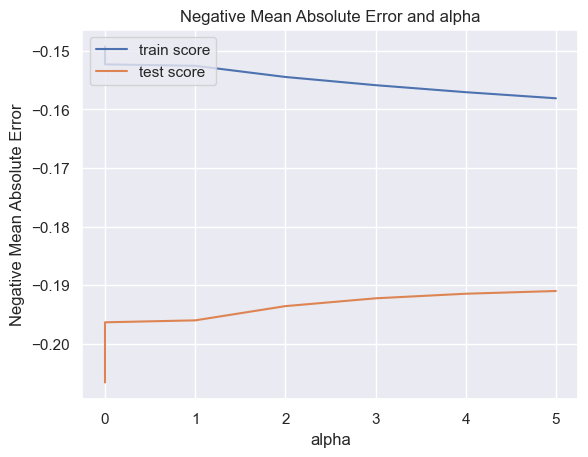

In [118]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [120]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.03826468,  0.02024763,  0.05835812,  0.14869304,  0.11800616,
       -0.00391155,  0.07020719,  0.01721142,  0.08404622,  0.09191724,
        0.10977402,  0.01205797,  0.17489293,  0.02694982, -0.00212201,
        0.0205476 ,  0.02877184,  0.00086946, -0.01229809,  0.00807919,
        0.04786834,  0.03105051, -0.00244925,  0.02833504,  0.01131638,
        0.03251595,  0.02236234, -0.16169788,  0.34211364,  0.24231918,
        0.28788335,  0.22346577,  0.00505137, -0.04803677,  0.0006311 ,
        0.02845682, -0.04773218,  0.00697618,  0.04017171, -0.04946043,
       -0.11782549, -0.05521159,  0.02350761, -0.08977809, -0.03469951,
       -0.05389898,  0.02145246,  0.08585133, -0.01749799,  0.26235744,
       -0.12878872, -0.02237305, -0.19796186, -0.2594211 , -0.09659984,
       -0.04299668,  0.10972196, -0.04820218,  0.08197935,  0.10165785,
       -0.12145099, -0.10739061, -0.01890793,  0.00826057,  0.05409674,
        0.21320266, -0.00854757,  0.08622504,  0.03322891,  0.15

In [121]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 27.03),
 ('MSSubClass', -0.038),
 ('LotFrontage', 0.02),
 ('LotArea', 0.058),
 ('OverallQual', 0.149),
 ('OverallCond', 0.118),
 ('MasVnrArea', -0.004),
 ('BsmtFinSF1', 0.07),
 ('BsmtFinSF2', 0.017),
 ('TotalBsmtSF', 0.084),
 ('1stFlrSF', 0.092),
 ('2ndFlrSF', 0.11),
 ('LowQualFinSF', 0.012),
 ('GrLivArea', 0.175),
 ('BsmtFullBath', 0.027),
 ('BsmtHalfBath', -0.002),
 ('FullBath', 0.021),
 ('HalfBath', 0.029),
 ('BedroomAbvGr', 0.001),
 ('KitchenAbvGr', -0.012),
 ('Fireplaces', 0.008),
 ('GarageArea', 0.048),
 ('WoodDeckSF', 0.031),
 ('OpenPorchSF', -0.002),
 ('EnclosedPorch', 0.028),
 ('3SsnPorch', 0.011),
 ('ScreenPorch', 0.033),
 ('PoolArea', 0.022),
 ('PropAge', -0.162),
 ('MSZoning_FV', 0.342),
 ('MSZoning_RH', 0.242),
 ('MSZoning_RL', 0.288),
 ('MSZoning_RM', 0.223),
 ('LotShape_IR2', 0.005),
 ('LotShape_IR3', -0.048),
 ('LotShape_Reg', 0.001),
 ('LandContour_HLS', 0.028),
 ('LandContour_Low', -0.048),
 ('LandContour_Lvl', 0.007),
 ('LotConfig_CulDSac', 0.04),
 ('Lo

In [122]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9364594823913764
0.9077597079469457


In [123]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.26446998692429163


It is clearly visible that the model performance is better than Lasso. The train and the test scores are matching well

In [124]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [125]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                 constant  27.030
29             MSZoning_FV   0.342
31             MSZoning_RL   0.288
50    Neighborhood_Crawfor   0.262
30             MSZoning_RH   0.242
32             MSZoning_RM   0.223
210  SaleCondition_Partial   0.223
66    Neighborhood_StoneBr   0.213
13               GrLivArea   0.175
209   SaleCondition_Normal   0.170
95     Exterior1st_BrkFace   0.158
70         Condition1_Norm   0.153
136       Foundation_Stone   0.153
4              OverallQual   0.149
206  SaleCondition_AdjLand   0.141
200         SaleType_ConLD   0.135
103     Exterior1st_Stucco   0.126
198           SaleType_CWD   0.124
124       MasVnrType_Stone   0.121
5              OverallCond   0.118

In [126]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                constant  27.030
29            MSZoning_FV   0.342
31            MSZoning_RL   0.288
50   Neighborhood_Crawfor   0.262
30            MSZoning_RH   0.242
..                    ...     ...
173        KitchenQual_TA  -0.184
53    Neighborhood_IDOTRR  -0.198
94    Exterior1st_BrkComm  -0.220
83      HouseStyle_2.5Fin  -0.230
54   Neighborhood_MeadowV  -0.259

[211 rows x 2 columns]

In [127]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                constant  27.030
29            MSZoning_FV   0.342
31            MSZoning_RL   0.288
50   Neighborhood_Crawfor   0.262
30            MSZoning_RH   0.242
..                    ...     ...
173        KitchenQual_TA  -0.184
53    Neighborhood_IDOTRR  -0.198
94    Exterior1st_BrkComm  -0.220
83      HouseStyle_2.5Fin  -0.230
54   Neighborhood_MeadowV  -0.259

[208 rows x 2 columns]

Observation:
Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
It is always advisable to use simple yet robust model.